In [1]:
from math import sqrt
import kauri as kr
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 12, 13, 14

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [2]:
def stability_region_star(method, xlim=(-4, 2), ylim=(-3, 3), resolution=500, title = None, filename = None):
    title_ = title
    order_star_title_ = None if title is None else "Order Star of " + title
    
    fig, axes = plt.subplots(1, 2, figsize=(9, 4.5))
    cf1, R = stability_region_(axes[0], method, xlim = xlim, ylim = ylim, resolution = resolution, title = "Stability of " + title_)
    cf2 = order_star_plot(axes[1], R, xlim=xlim, ylim=ylim, resolution=resolution, title=order_star_title_)
    plt.savefig("plots/stability_star_" + filename + ".eps")
    plt.savefig("plots/stability_star_" + filename + ".png")
    plt.show()

def stability_region(method, xlim=(-4, 2), ylim=(-3, 3), resolution=500, title = None):
    title_ = title
    sym_title_ = None if title is None else "Squared Symmetric Component of " + title
    
    fig, axes = plt.subplots(1, 2, figsize=(9, 4.5))
    cf1, R = stability_region_(axes[0], method, xlim = xlim, ylim = ylim, resolution = resolution, title = title_)
    cf2, R = stability_region_(axes[1],  method * method.adjoint(),  xlim = xlim, ylim = ylim, resolution = resolution, title = sym_title_)
    plt.savefig("plots/stability_" + title + ".eps")
    plt.savefig("plots/stability_" + title + ".png")
    plt.show()

def stability_region_(ax, method, xlim=(-4, 2), ylim=(-3, 3), resolution=500, title = None):
    A, b = np.array(method.a), np.array(method.b)
    x = np.linspace(xlim[0], xlim[1], resolution)
    y = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y  # Complex plane

    b = b[:, np.newaxis]
    I = np.eye(len(A))
    one = np.ones(shape=b.shape)
    
    def runge_kutta_stability_function(z):
        return np.abs(np.linalg.det(I - z * A + z * one @ b.T) / np.linalg.det(I - z * A))
    
    R = np.vectorize(runge_kutta_stability_function)(Z)
    
    contour_levels = np.linspace(0.04, 1, 10)
    cf = ax.contour(X, Y, R, levels=contour_levels, colors='k', linewidths = 0.3)
    ax.contour(X, Y, R, levels=[1], colors='black', linewidths=1.5)
    ax.axhline(0, color='k', linewidth=0.5)
    ax.axvline(0, color='k', linewidth=0.5)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("Re(z)")
    ax.set_ylabel("Im(z)")
    title_ = "" if title is None else title + " "
    ax.set_title(title_)
    return cf, R

def order_star_plot(ax, R, xlim=(-4, 2), ylim=(-3, 3), resolution=500, title=None):
    x = np.linspace(xlim[0], xlim[1], resolution)
    y = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    order_star_value = np.abs(R * np.exp(-Z))
    contour_levels = np.linspace(1, 2, 10)  # Adjust range as needed
    ax.contour(X, Y, order_star_value, levels=[1], colors='black', linewidths=1.5)
    
    ax.axhline(0, color='k', linewidth=0.5)
    ax.axvline(0, color='k', linewidth=0.5)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("Re(z)")
    ax.set_ylabel("Im(z)")
    
    if title:
        ax.set_title(title)

    return None


In [3]:
euler = kr.RK(np.array([[0]]), np.array([1]))

rk4 = kr.RK(np.array([[0, 0, 0, 0],
                    [0.5, 0, 0, 0],
                    [0, 0.5, 0, 0],
                    [0, 0, 1, 0]]),
          np.array([1/6, 1/3, 1/3, 1/6]))

# A-Stability

## Euler

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


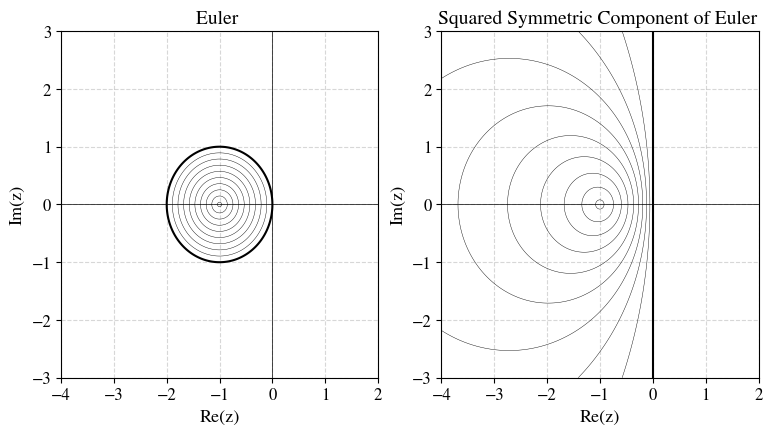

In [4]:
stability_region(euler, title = "Euler")

## RK4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


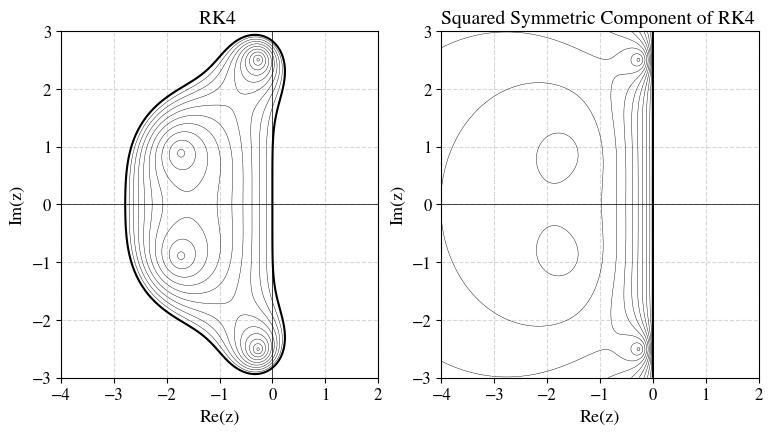

In [5]:
stability_region(rk4, title = "RK4")

# EES

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


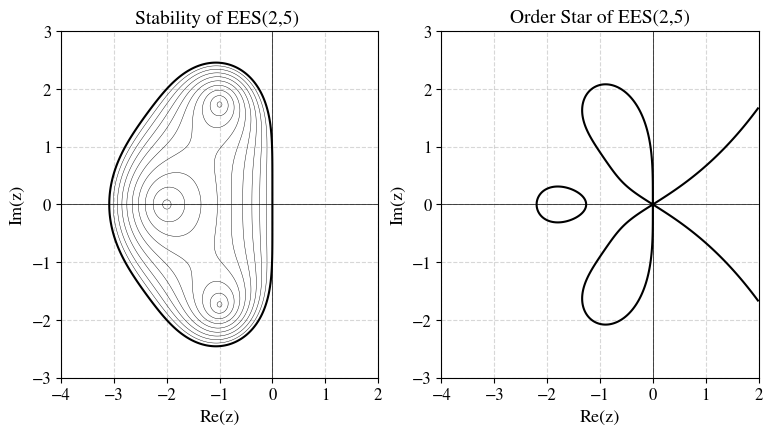

In [6]:
stability_region_star(kr.EES25(0.1), title = "EES(2,5)", filename = "EES25")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


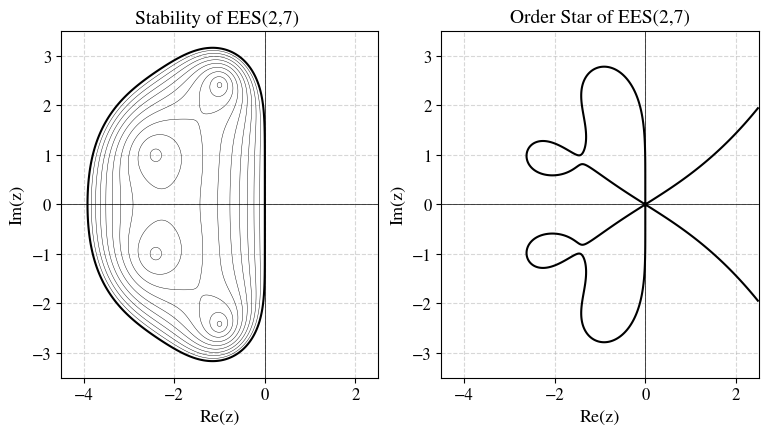

In [7]:
stability_region_star(kr.EES27((5 - 3*sqrt(2))/14), title = "EES(2,7)", filename = "EES27", xlim = (-4.5, 2.5), ylim = (-3.5, 3.5))